In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

/Users/bebik/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


##  Zeev
## 033363870
## Assaf
## 204249197
### setting and Downloading the tickets

In [2]:
hotels = pd.read_csv('/Users/bebik/Documents/hotels_data.csv')

In [3]:

import datetime

date_time_str = '2018/8/04'
print(hotels['Snapshot Date'][0])
#for index, row in hotels.iterrows():
tabletime = datetime.datetime.strptime( hotels['Snapshot Date'][0] , '%m/%d/%Y %H:%M')
now = datetime.datetime.strptime( date_time_str , '%Y/%m/%d')
newdt = tabletime - now
print (type(newdt))
print ( np.timedelta64(1, 'D').astype(int))


7/17/2015 0:00
<class 'datetime.timedelta'>
1


In [4]:
del hotels['Days'] #always 5
del hotels['Snapshot ID']



In [5]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [6]:
hotels.describe()


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [7]:
hotels['SnapDate']= pd.to_datetime(hotels['Snapshot Date']) 
hotels['CheckingDate']= pd.to_datetime(hotels['Checkin Date']) 
hotels['weekday']= hotels['CheckingDate'].dt.dayofweek

In [8]:
hotels['DayDiff'] = hotels['CheckingDate']-hotels['SnapDate']
hotels['Discount'] = hotels['Original Price']-hotels['Discount Price']
hotels['DiscountPerc'] = hotels['Discount']/hotels['Original Price']*100
#hotels['delta_days']= (hotels['CheckingDate']- now).astype(int)/8.636207/10**13
hotels['delta_days']=(pd.to_datetime(hotels['Checkin Date']) - pd.to_datetime(hotels['Snapshot Date'])).dt.days


In [9]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,weekday,DayDiff,Discount,DiscountPerc,delta_days
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823,2.917763,17 days 11:10:35.185894,152.569860,8.877715,17.465685
std,1042.355712,983.618013,1.005191,41.575482,0.846496,1.840536,10 days 00:57:55.438813,143.316985,6.030248,10.040225
min,289.000000,260.000000,1.000000,-1.000000,0.000000,0.000000,1 days 00:00:00,15.000000,0.581395,1.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000,2.000000,9 days 00:00:00,70.000000,4.844961,9.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000,3.000000,18 days 00:00:00,103.000000,7.056229,18.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000,4.000000,26 days 00:00:00,180.000000,10.933941,26.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000,6.000000,34 days 00:00:00,3760.000000,68.425842,34.000000


In [10]:
import numpy 
vals = numpy.unique(hotels['Hotel Name'].values)
checkins = numpy.unique(hotels['Checkin Date'].values)
hotels_num = numpy.unique(hotels['Hotel Name'].values)
print (type(hotels_num[0]))
#print(checkins,len(checkins))             
#print(hotels_num,len(hotels_num))             
numbers = []
for i in range(len(vals)) :
    numbers.append(i)
print (len(vals),len(numbers) )
hotels['hotel']=hotels['Hotel Name']
hotels['hotel'].replace(to_replace=vals, value=numbers,inplace = True)
hotels.head()


<class 'str'>
554 554


,Snapshot Date,Checkin Date,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,SnapDate,CheckingDate,weekday,DayDiff,Discount,DiscountPerc,delta_days,hotel
0,7/17/2015 0:00,8/12/2015 0:00,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,2015-07-17,2015-08-12,2,26 days,138,11.714771,26,35
1,7/17/2015 0:00,8/19/2015 0:00,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,2015-07-17,2015-08-19,2,33 days,131,11.769991,33,35
2,7/17/2015 0:00,8/13/2015 0:00,4370,4240,1,3,The Peninsula New York,5,2015-07-17,2015-08-13,3,27 days,130,2.974828,27,482
3,7/17/2015 0:00,7/26/2015 0:00,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,2015-07-17,2015-07-26,6,9 days,72,4.140311,9,127
4,7/17/2015 0:00,8/12/2015 0:00,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,2015-07-17,2015-08-12,2,26 days,67,3.852789,26,127


In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)
X = hotels.copy()
y = X['Discount Code']
del X['Hotel Stars']
del X['Discount Code']

#del X['DiscountPerc']



X['days_delta'] = X['DayDiff'].astype('timedelta64[D]')
del X['DayDiff']
del X['Snapshot Date']
del X['Checkin Date']
del X['Hotel Name']
del X['SnapDate']
del X['CheckingDate']
#del X['Discount Price']
del X['Discount']

print(X.describe())





       Original Price  Discount Price  Available Rooms        weekday  \
count   187848.000000   187848.000000    187848.000000  187848.000000   
mean      1825.742143     1673.172283        14.588561       2.917763   
std       1042.355712      983.618013        41.575482       1.840536   
min        289.000000      260.000000        -1.000000       0.000000   
25%       1160.000000     1035.000000        -1.000000       2.000000   
50%       1599.000000     1475.000000        -1.000000       3.000000   
75%       2160.000000     1963.250000         8.000000       4.000000   
max      29975.000000    28675.000000       431.000000       6.000000   

        DiscountPerc     delta_days          hotel     days_delta  
count  187848.000000  187848.000000  187848.000000  187848.000000  
mean        8.877715      17.465685     289.105655      17.465685  
std         6.030248      10.040225     146.185570      10.040225  
min         0.581395       1.000000       0.000000       1.000000  
25

In [12]:
from sklearn import tree
#X, y = load_iris(return_X_y=True)
#clf2 = tree.DecisionTreeClassifier()
#clf2 = clf2.fit(X_train, y_train)
#clf2 = clf2.predict(X_test)
#tree.plot_tree(clf2) 
#print(clf2)

In [13]:
#tree.plot_tree(clf2) 

In [14]:
#X_test=X_test.append([2000,2,3,4,5])
#print (len(X_test))
#print (clf.predict(X_test[:1]))
#print (X_test[:1])

#array([1, 0])
#clf.score(X_test, y_test)



In [15]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import os
pic_size = 256
os.environ['KMP_DUPLICATE_LIB_OK']='True'


class Simple_MLP(nn.Module):
    def __init__(self,size_list):
        super(Simple_MLP,self).__init__()
        layers=[]
        self.size_list = size_list
        for i in range(len(size_list) -2):
            layers.append(nn.Linear(size_list[i],size_list[i+1]))
            op = random.randint(0,2) 
            
            layers.append(torch.nn.ReLU())
        #layers.append(nn.Linear(size_list[-3],size_list[-2]))
        #layers.append(nn.Softmax(dim=1))
        layers.append(nn.Linear(size_list[-2],size_list[-1]))
        self.net = nn.Sequential(*layers)
        
    def forward(self,x):
        return self.net(x)

In [16]:
class HotelsDataset(data.Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self,index):
        X = self.X[index].float()
        Y = self.Y[index].float()
        return X,Y

In [17]:
import pandas as pd
import numpy as np
import torch

def df_to_tensor(df):
    #device = get_device()
    #return torch.from_numpy(df.values)
    return torch.FloatTensor(df.values)
def create_set(num,df,target_col):
    print(' target column is ',target_col)
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.FloatTensor(target_sample[target_col].values)
    #print("train_target ",ten_train_target)
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)

    #print ("target is " , ten_train_target)
    #print(ten_train_target)
    train_dataset = HotelsDataset(ten_train_data,ten_train_target)


    train_loader_args = dict(shuffle=True,batch_size=pic_size)
    train_loader = data.DataLoader(train_dataset,**train_loader_args)
    return train_loader

def create_set2(num,df,target_col):
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.FloatTensor(target_sample[target_col].values)
    
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)

    return ten_train_data




In [18]:

import random

#criterion = nn.L1Loss()
first_round = 7
#first_round = 5


end_round  = 1
device = torch.device( "cpu")
def create_ar(lens):
    
    r1 = 160
    r2 = 160
    ar = [first_round]
    for i in range(random.randint(1,lens)):
        r1 = random.randint(4,140)
        ar.append( r1  )
        r2 = random.randint(4,140)
        ar.append(  r2 )
    ar.append(end_round)
    return ar


#create next generations
def next_gen(best_ar):
    
    ar_left = []
    ar_right = []
    for index,item in enumerate(best_ar):
        r1 = random.randint(4,140)
        if (index is 0 or index is len(best_ar)-1):
            r1=item
        if (index < len(best_ar)/2 ):
            ar_left.append(item)
            ar_right.append(r1)
        else:
            ar_left.append(r1)
            ar_right.append(item)
    
    return ar_left,ar_right,best_ar



def create_model(ar): 
    print("create_model = ",ar)
    model = Simple_MLP(ar)
    optimizer = optim.Adam(model.parameters())
    print(model)
    return model,optimizer ,ar
ar2=create_ar(10)
model,optimizer ,ar2= create_model(ar2)
next_gen(ar2)

create_model =  [7, 65, 47, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=65, bias=True)
    (1): ReLU()
    (2): Linear(in_features=65, out_features=47, bias=True)
    (3): ReLU()
    (4): Linear(in_features=47, out_features=1, bias=True)
  )
)


([7, 65, 40, 1], [7, 98, 47, 1], [7, 65, 47, 1])

In [19]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms

import matplotlib.pyplot as plt

import os
def create_data_loader(df,target_col):
    target = pd.DataFrame(df[ target_col] )
    #print(target)
    ten_target = torch.FloatTensor(target[target_col].values)
    df = df.drop(target_col ,axis=1 )
    ten_data = df_to_tensor(df)
    #print (ten_data)

    _dataset = HotelsDataset(ten_data,ten_target)



#    test_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
#    else 
    test_loader_args = dict(shuffle=True,batch_size=pic_size)
    loader = data.DataLoader(_dataset,**test_loader_args)
    return ten_target,loader



In [20]:
df_train = hotels.copy()
del df_train['DayDiff']
del df_train['Snapshot Date']
#hotels_df['SnapshotUnixDate']  = pd.to_datetime(hotels_df['Snapshot Date'])

del df_train['Checkin Date']
del df_train['Hotel Name']
del df_train['SnapDate']
del df_train['CheckingDate']


target_columns = 'DiscountPerc'
#target_columns = 'Discount Price'
from sklearn.model_selection import train_test_split

df_train, df_validate = train_test_split(df_train, test_size=0.2)
df_train2 = df_train.copy()
#print(df_validate.describe())
ten_target,loader = create_data_loader(df_train2,target_columns)
#df_validate =  df_train.sample(n = 10000)


df_validate = df_validate.drop("Discount Price" ,axis=1 )
#df_validate = df_validate.drop("DiscountPerc" ,axis=1 )
df_validate = df_validate.drop("Discount" ,axis=1 )
validate_target, validate_loader = create_data_loader(df_validate,target_columns)
#df_train.describe()

## Evolutionary algorithm with Deep networks

1. Starting with random network with Relu activation functions.
2. each generation take the 
    a. original
    b. left original + random   right
    c. left random   + original right
    d. random (with random size)

In [21]:
import time
def train_epoch(model,train_loader,criterion,optimizer):
    #print(1)
    model.train()
    model.to(device)
    running_loss=0.0
    
    start_time = time.time()
    for batch_idx, (data,target) in enumerate(train_loader):
        #print (target)
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        outputs = model(data)
        
        target = target.unsqueeze(1)
        target = target.float() 
        
        
        loss = criterion(outputs,target)
        running_loss += loss.item()
        #print("Train Loss item: ", loss.item() )
        #print (outputs)
        loss.backward()
        optimizer.step()
    
    end_time = time.time()   
    running_loss /= len(train_loader)
    print("Train Loss: ", running_loss, ' Time: ', end_time-start_time)
    return running_loss




In [22]:
def test_epoch(model,test_loader,criterion):
    with torch.no_grad():
        #print(1)
        model.eval()
        model.to(device)
        
        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #print(2)
        total_acc =0
        index =0
        acc =0
        acc1 =0
        for batch_idx, (data,target) in enumerate(test_loader):
            #print(3)
            data = data.to(device)
            target = target.to(device)
            outputs = model(data)
            
            #print ("outputs 1= ", outputs[1] ) 
            #print ("outputs  ", outputs ) 
            #print ("target x = ", target)
            # Predicted discount / Discount
            acc1 = (outputs.data/target.data)
            #print ("acc is x= ",acc)
            loss = criterion(outputs,target).detach()
            running_loss += loss.item()
            total_acc +=torch.mean(acc1[0]) 
            index = index + 1
        acc = total_acc/index
        running_loss /= len(test_loader)
        
        print ("mean acc = ",acc )
            
        return running_loss,acc

# run the algorithm 

In [23]:
#df_train_bkup = df_train.copy()

#df_train = df_train.drop("Available Rooms" ,axis=1 )
#df_train = df_train.drop("Discount Code" ,axis=1 )
#df_train = df_train.drop("Hotel Stars" ,axis=1 )
#df_train = df_train.drop("weekday" ,axis=1 )
#df_train = df_train.drop("Discount" ,axis=1 )
#df_train = df_train.drop("delta_days" ,axis=1 )


df_train = df_train.drop("Discount Price" ,axis=1 )

#df_train = df_train.drop("DiscountPerc" ,axis=1 )



df_train = df_train.drop("Discount" ,axis=1 )


df_train.head(100)



,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
88948,1022,2,-1,3,2,6.262231,28,175
244,1606,1,1,4,3,5.479452,34,299
103134,670,2,-1,2,5,6.268657,15,351
139461,809,1,15,4,5,5.438813,23,106
84564,2479,2,2,5,3,5.808794,4,387
...,...,...,...,...,...,...,...,...
32048,3045,3,1,4,1,4.926108,15,471
103240,3938,3,8,5,1,5.713560,18,485
47280,3763,2,-1,5,5,12.968376,21,341
16518,3275,3,-1,5,4,18.137405,24,472


In [24]:
df_train.describe()

,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
count,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000
mean,1825.453892,2.432019,14.533405,3.906879,2.918138,8.875838,17.471819,288.911364
std,1042.298465,1.005051,41.415479,0.847168,1.842456,6.023344,10.038521,146.130970
min,289.000000,1.000000,-1.000000,0.000000,0.000000,0.581395,1.000000,0.000000
25%,1160.000000,2.000000,-1.000000,3.000000,1.000000,4.840183,9.000000,176.000000
50%,1598.000000,2.000000,-1.000000,4.000000,3.000000,7.053789,18.000000,285.000000
75%,2158.000000,3.000000,8.000000,4.000000,4.000000,10.942249,26.000000,397.000000
max,29975.000000,4.000000,431.000000,5.000000,6.000000,56.410256,34.000000,553.000000


In [25]:

n_epoch =8
Train_loss = []
Test_loss = []
Test_acc = []

#model2,optimizer2 = create_model()
acc1 =0
acc2 =0

arx = create_ar(8)
best , ar1,ar2 = next_gen(arx)
#This is the 4 models that we are working on 
loops = [best,ar1,ar2,arx]

target_columns='DiscountPerc'
#target_columns = 'perc'
results =[]
best_score =100000000
best_index =-1
a,b,best =[],[],[]
for generations in range (10):
    #plt.plot(Test_acc)
    #Loop over the models and choose the best one.
    for index in range(4):
        criterion = nn.MSELoss()
        #criterion = nn.CrossEntropyLoss()
        model ,optimizer ,ar = create_model(loops[index])
        temp_model = model
        temp_optimizer = optimizer
       
        for i in range(n_epoch):
            #print (df_train.head())
            train_loader = create_set(1000,df_train,target_columns)
            #print(df_train.head())
            train_loss = train_epoch(temp_model,train_loader,criterion,temp_optimizer)
            test_loss ,acc= test_epoch(temp_model,validate_loader,criterion)
            
            #Train_loss.append(train_loss)
            Test_loss.append(test_loss)
            print("train loss",train_loss)
            print("test loss" , test_loss)
            #Test_acc.append(test_acc)
            print('='*50,'gen=',generations,'index',i,'vector=',index)
        
        if (test_loss < best_score):
            print ("updating model ======= ", test_loss)
            best_model = temp_model
            best_optimizer = temp_optimizer
            best_score = test_loss
            best_index = index
        
        results.append(test_loss)
    
    
    a,b,best = next_gen(loops[index])
    c=create_ar(8)
    results =[]
    
    



    

create_model =  [7, 134, 115, 140, 50, 114, 131, 124, 54, 103, 18, 19, 66, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=134, bias=True)
    (1): ReLU()
    (2): Linear(in_features=134, out_features=115, bias=True)
    (3): ReLU()
    (4): Linear(in_features=115, out_features=140, bias=True)
    (5): ReLU()
    (6): Linear(in_features=140, out_features=50, bias=True)
    (7): ReLU()
    (8): Linear(in_features=50, out_features=114, bias=True)
    (9): ReLU()
    (10): Linear(in_features=114, out_features=131, bias=True)
    (11): ReLU()
    (12): Linear(in_features=131, out_features=124, bias=True)
    (13): ReLU()
    (14): Linear(in_features=124, out_features=54, bias=True)
    (15): ReLU()
    (16): Linear(in_features=54, out_features=103, bias=True)
    (17): ReLU()
    (18): Linear(in_features=103, out_features=18, bias=True)
    (19): ReLU()
    (20): Linear(in_features=18, out_features=19, bias=True)
    (21): ReLU()
    (22): Linear(in_features

/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([194])) that is different to the input size (torch.Size([194, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


mean acc =  tensor(0.0556)
train loss 119.61901664733887
test loss 109.71541190633968
================================================== gen= 0 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  116.24741744995117  Time:  0.028885841369628906
mean acc =  tensor(0.3611)
train loss 116.24741744995117
test loss 82.48407864732808
================================================== gen= 0 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  63.24567222595215  Time:  0.02941417694091797
mean acc =  tensor(1.4543)
train loss 63.24567222595215
test loss 62.12513200928565
================================================== gen= 0 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  70.6006498336792  Time:  0.0302889347076416
mean acc =  tensor(0.8681)
train loss 70.6006498336792
test loss 57.82615350217235
================================================== gen= 0 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  57.80742073059082  Time:  0.033627033233

mean acc =  tensor(0.0334)
train loss 114.32609558105469
test loss 111.90443757764336
================================================== gen= 0 index 0 vector= 3
 target column is  DiscountPerc
Train Loss:  101.04493141174316  Time:  0.03032207489013672
mean acc =  tensor(0.3081)
train loss 101.04493141174316
test loss 86.29345043986832
================================================== gen= 0 index 1 vector= 3
 target column is  DiscountPerc
Train Loss:  65.30081367492676  Time:  0.02993631362915039
mean acc =  tensor(1.6107)
train loss 65.30081367492676
test loss 68.65325032448283
================================================== gen= 0 index 2 vector= 3
 target column is  DiscountPerc
Train Loss:  63.4921932220459  Time:  0.031123876571655273
mean acc =  tensor(0.7574)
train loss 63.4921932220459
test loss 60.516020067695045
================================================== gen= 0 index 3 vector= 3
 target column is  DiscountPerc
Train Loss:  68.57570743560791  Time:  0.0350031852

mean acc =  tensor(0.0222)
train loss 116.5106315612793
test loss 113.19001458615674
================================================== gen= 1 index 0 vector= 2
 target column is  DiscountPerc
Train Loss:  114.4984016418457  Time:  0.030858993530273438
mean acc =  tensor(0.2180)
train loss 114.4984016418457
test loss 94.45153585420985
================================================== gen= 1 index 1 vector= 2
 target column is  DiscountPerc
Train Loss:  83.57366561889648  Time:  0.029792070388793945
mean acc =  tensor(1.3600)
train loss 83.57366561889648
test loss 58.50640799074757
================================================== gen= 1 index 2 vector= 2
 target column is  DiscountPerc
Train Loss:  67.79944038391113  Time:  0.032134056091308594
mean acc =  tensor(0.9061)
train loss 67.79944038391113
test loss 54.91193854403333
================================================== gen= 1 index 3 vector= 2
 target column is  DiscountPerc
Train Loss:  57.095624923706055  Time:  0.031794786

mean acc =  tensor(0.0030)
train loss 117.19084548950195
test loss 115.34058535828882
================================================== gen= 2 index 0 vector= 1
 target column is  DiscountPerc
Train Loss:  112.21441459655762  Time:  0.025146961212158203
mean acc =  tensor(0.0414)
train loss 112.21441459655762
test loss 111.11644750063111
================================================== gen= 2 index 1 vector= 1
 target column is  DiscountPerc
Train Loss:  100.58449363708496  Time:  0.0247042179107666
mean acc =  tensor(0.2100)
train loss 100.58449363708496
test loss 95.46708819330955
================================================== gen= 2 index 2 vector= 1
 target column is  DiscountPerc
Train Loss:  81.19926261901855  Time:  0.02815413475036621
mean acc =  tensor(0.8678)
train loss 81.19926261901855
test loss 56.14089052368995
================================================== gen= 2 index 3 vector= 1
 target column is  DiscountPerc
Train Loss:  67.92040729522705  Time:  0.0261828

mean acc =  tensor(0.0110)
train loss 114.52476692199707
test loss 114.46136121685002
================================================== gen= 3 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  106.86164093017578  Time:  0.02962207794189453
mean acc =  tensor(0.1650)
train loss 106.86164093017578
test loss 98.69039538117494
================================================== gen= 3 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  78.54873657226562  Time:  0.0290071964263916
mean acc =  tensor(1.2329)
train loss 78.54873657226562
test loss 57.48389725458054
================================================== gen= 3 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  67.17510604858398  Time:  0.031516075134277344
mean acc =  tensor(0.9338)
train loss 67.17510604858398
test loss 56.438334173085735
================================================== gen= 3 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  67.02861881256104  Time:  0.028837919

mean acc =  tensor(0.0961)
train loss 113.23997497558594
test loss 104.64832773013991
================================================== gen= 3 index 0 vector= 3
 target column is  DiscountPerc
Train Loss:  80.92068862915039  Time:  0.03139615058898926
mean acc =  tensor(1.0178)
train loss 80.92068862915039
test loss 55.40372651288298
================================================== gen= 3 index 1 vector= 3
 target column is  DiscountPerc
Train Loss:  75.431809425354  Time:  0.028050899505615234
mean acc =  tensor(0.8438)
train loss 75.431809425354
test loss 56.61990195553319
================================================== gen= 3 index 2 vector= 3
 target column is  DiscountPerc
Train Loss:  61.15364933013916  Time:  0.0298001766204834
mean acc =  tensor(0.6922)
train loss 61.15364933013916
test loss 62.42221673978429
================================================== gen= 3 index 3 vector= 3
 target column is  DiscountPerc
Train Loss:  58.61150646209717  Time:  0.0718872547149658

mean acc =  tensor(0.0771)
train loss 115.03446769714355
test loss 107.33083820991776
================================================== gen= 4 index 0 vector= 2
 target column is  DiscountPerc
Train Loss:  97.14189720153809  Time:  0.03010082244873047
mean acc =  tensor(0.5864)
train loss 97.14189720153809
test loss 66.28462294494214
================================================== gen= 4 index 1 vector= 2
 target column is  DiscountPerc
Train Loss:  62.35263442993164  Time:  0.028804779052734375
mean acc =  tensor(1.2249)
train loss 62.35263442993164
test loss 54.173150588055044
================================================== gen= 4 index 2 vector= 2
 target column is  DiscountPerc
Train Loss:  63.94679260253906  Time:  0.02863597869873047
mean acc =  tensor(0.7989)
train loss 63.94679260253906
test loss 57.283793884069745
================================================== gen= 4 index 3 vector= 2
 target column is  DiscountPerc
Train Loss:  58.44932842254639  Time:  0.031975030

mean acc =  tensor(0.0026)
train loss 115.09497451782227
test loss 115.37638756369248
================================================== gen= 5 index 0 vector= 1
 target column is  DiscountPerc
Train Loss:  109.48715782165527  Time:  0.025509119033813477
mean acc =  tensor(0.0463)
train loss 109.48715782165527
test loss 110.65832815364915
================================================== gen= 5 index 1 vector= 1
 target column is  DiscountPerc
Train Loss:  103.09577941894531  Time:  0.02520895004272461
mean acc =  tensor(0.2069)
train loss 103.09577941894531
test loss 94.68260099449937
================================================== gen= 5 index 2 vector= 1
 target column is  DiscountPerc
Train Loss:  87.19661617279053  Time:  0.024407148361206055
mean acc =  tensor(0.8277)
train loss 87.19661617279053
test loss 57.641662727407855
================================================== gen= 5 index 3 vector= 1
 target column is  DiscountPerc
Train Loss:  68.65922927856445  Time:  0.0253

mean acc =  tensor(0.0781)
train loss 110.89293098449707
test loss 107.8888190133231
================================================== gen= 6 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  89.71265125274658  Time:  0.030195951461791992
mean acc =  tensor(0.8741)
train loss 89.71265125274658
test loss 57.74139611899447
================================================== gen= 6 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  72.8306884765625  Time:  0.029882192611694336
mean acc =  tensor(1.1467)
train loss 72.8306884765625
test loss 54.44859090792079
================================================== gen= 6 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  56.155213356018066  Time:  0.02988576889038086
mean acc =  tensor(0.5549)
train loss 56.155213356018066
test loss 69.78766201304741
================================================== gen= 6 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  76.93941020965576  Time:  0.02885508537

mean acc =  tensor(0.0325)
train loss 110.74275970458984
test loss 112.25284664647108
================================================== gen= 6 index 0 vector= 3
 target column is  DiscountPerc
Train Loss:  101.41510772705078  Time:  0.02965712547302246
mean acc =  tensor(0.4906)
train loss 101.41510772705078
test loss 75.79846702627584
================================================== gen= 6 index 1 vector= 3
 target column is  DiscountPerc
Train Loss:  73.21072578430176  Time:  0.029342174530029297
mean acc =  tensor(1.3969)
train loss 73.21072578430176
test loss 59.59940226548383
================================================== gen= 6 index 2 vector= 3
 target column is  DiscountPerc
Train Loss:  65.19400119781494  Time:  0.029862165451049805
mean acc =  tensor(0.7669)
train loss 65.19400119781494
test loss 60.13458259738221
================================================== gen= 6 index 3 vector= 3
 target column is  DiscountPerc
Train Loss:  57.28753852844238  Time:  0.03175306

mean acc =  tensor(0.0894)
train loss 102.01114654541016
test loss 106.9865255031456
================================================== gen= 7 index 0 vector= 2
 target column is  DiscountPerc
Train Loss:  100.87567329406738  Time:  0.03150510787963867
mean acc =  tensor(0.8102)
train loss 100.87567329406738
test loss 58.35680750113766
================================================== gen= 7 index 1 vector= 2
 target column is  DiscountPerc
Train Loss:  71.54125499725342  Time:  0.029703855514526367
mean acc =  tensor(0.9632)
train loss 71.54125499725342
test loss 55.46180748452946
================================================== gen= 7 index 2 vector= 2
 target column is  DiscountPerc
Train Loss:  60.372703552246094  Time:  0.029778003692626953
mean acc =  tensor(0.6409)
train loss 60.372703552246094
test loss 64.1294728493204
================================================== gen= 7 index 3 vector= 2
 target column is  DiscountPerc
Train Loss:  66.3173360824585  Time:  0.029642105

mean acc =  tensor(0.0233)
train loss 123.9906997680664
test loss 113.06615095073674
================================================== gen= 8 index 0 vector= 1
 target column is  DiscountPerc
Train Loss:  117.21597480773926  Time:  0.02462291717529297
mean acc =  tensor(0.1114)
train loss 117.21597480773926
test loss 103.33878689720517
================================================== gen= 8 index 1 vector= 1
 target column is  DiscountPerc
Train Loss:  98.18808555603027  Time:  0.02437615394592285
mean acc =  tensor(0.4953)
train loss 98.18808555603027
test loss 74.81267026005959
================================================== gen= 8 index 2 vector= 1
 target column is  DiscountPerc
Train Loss:  74.33551406860352  Time:  0.026648998260498047
mean acc =  tensor(1.4287)
train loss 74.33551406860352
test loss 59.233276860243606
================================================== gen= 8 index 3 vector= 1
 target column is  DiscountPerc
Train Loss:  59.8034610748291  Time:  0.024867057

mean acc =  tensor(-0.0041)
train loss 110.58150482177734
test loss 116.08222265957164
================================================== gen= 9 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  109.21502113342285  Time:  0.033551692962646484
mean acc =  tensor(0.0245)
train loss 109.21502113342285
test loss 112.90518136575919
================================================== gen= 9 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  110.49917793273926  Time:  0.03237318992614746
mean acc =  tensor(0.1974)
train loss 110.49917793273926
test loss 96.04531642368862
================================================== gen= 9 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  77.2363510131836  Time:  0.028367042541503906
mean acc =  tensor(1.2988)
train loss 77.2363510131836
test loss 55.69128952545373
================================================== gen= 9 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  67.60593891143799  Time:  0.028939

mean acc =  tensor(0.0305)
train loss 113.79437255859375
test loss 112.48582925601882
================================================== gen= 9 index 0 vector= 3
 target column is  DiscountPerc
Train Loss:  100.85870361328125  Time:  0.03299379348754883
mean acc =  tensor(0.3081)
train loss 100.85870361328125
test loss 86.03997156571369
================================================== gen= 9 index 1 vector= 3
 target column is  DiscountPerc
Train Loss:  67.91121196746826  Time:  0.029481172561645508
mean acc =  tensor(1.3891)
train loss 67.91121196746826
test loss 56.34410736187785
================================================== gen= 9 index 2 vector= 3
 target column is  DiscountPerc
Train Loss:  55.94496440887451  Time:  0.029805660247802734
mean acc =  tensor(0.6946)
train loss 55.94496440887451
test loss 62.08015262837313
================================================== gen= 9 index 3 vector= 3
 target column is  DiscountPerc
Train Loss:  66.14062213897705  Time:  0.03175497

In [26]:
#continue to train with the selected model

In [27]:
for i in range(33):
            train_loader = create_set(50000,df_train,target_columns)
            train_loss = train_epoch(best_model,train_loader,criterion,best_optimizer)
            test_loss ,acc= test_epoch(best_model,validate_loader,criterion)

            Test_acc.append(acc)
            Train_loss.append(train_loss)
            Test_loss.append(test_loss)
      
            #print('='*50,i)

print (Test_acc)

 target column is  DiscountPerc
Train Loss:  43.509727867282166  Time:  1.2682158946990967
mean acc =  tensor(1.4997)
 target column is  DiscountPerc
Train Loss:  34.828976709015514  Time:  1.2442409992218018
mean acc =  tensor(1.4480)
 target column is  DiscountPerc
Train Loss:  34.36869135681464  Time:  1.3505358695983887
mean acc =  tensor(1.4616)
 target column is  DiscountPerc
Train Loss:  33.553925446101594  Time:  1.26761794090271
mean acc =  tensor(1.4707)
 target column is  DiscountPerc
Train Loss:  33.14901985440935  Time:  1.2816102504730225
mean acc =  tensor(1.3923)
 target column is  DiscountPerc
Train Loss:  32.54704367384619  Time:  1.3060078620910645
mean acc =  tensor(1.4893)
 target column is  DiscountPerc
Train Loss:  32.45576979189503  Time:  1.291234016418457
mean acc =  tensor(1.4279)
 target column is  DiscountPerc
Train Loss:  32.58317809202233  Time:  1.3442602157592773
mean acc =  tensor(1.5148)
 target column is  DiscountPerc
Train Loss:  32.427440156742016 

In [28]:
print (Test_acc)

[tensor(1.4997), tensor(1.4480), tensor(1.4616), tensor(1.4707), tensor(1.3923), tensor(1.4893), tensor(1.4279), tensor(1.5148), tensor(1.5381), tensor(1.3813), tensor(1.4291), tensor(1.3563), tensor(1.4853), tensor(1.4182), tensor(1.4179), tensor(1.3669), tensor(1.3751), tensor(1.5274), tensor(1.3534), tensor(1.4216), tensor(1.3461), tensor(1.5915), tensor(1.3905), tensor(1.4284), tensor(1.4418), tensor(1.5136), tensor(1.5041), tensor(1.4901), tensor(1.3904), tensor(1.5193), tensor(1.3758), tensor(1.3866), tensor(1.4750)]


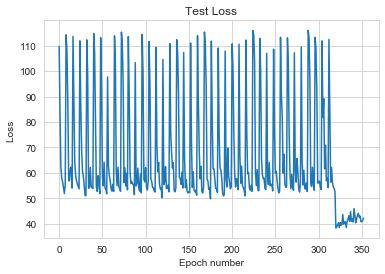

In [29]:
plt.title('Test Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss ')
plt.plot(Test_loss)


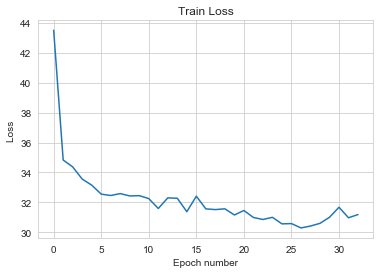

In [30]:
plt.title('Train Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss ')
plt.plot(Train_loss)

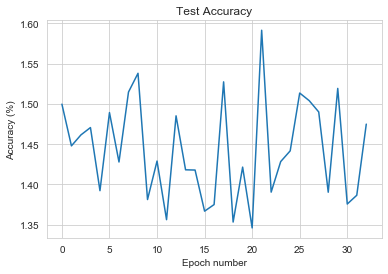

In [31]:
plt.title('Test Accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.plot(Test_acc)

In [32]:
def submit_epoch(model,data):
    with torch.no_grad():
        #print(1)
        results = []
        model.eval()
        model.to(device)
        
        for batch_idx, data in enumerate(data):
          
            data = data.to(device)
            outputs = model(data)
            print (outputs)
            

In [33]:
X = df_train.sample(n=10000)

X.describe()

newset = create_set2(100,X,target_columns)
submit_epoch(best_model,newset)


tensor([8.6421])
tensor([8.1925])
tensor([8.3114])
tensor([9.7588])
tensor([8.1506])
tensor([8.1409])
tensor([8.4337])
tensor([8.2220])
tensor([7.9009])
tensor([10.1017])
tensor([8.3710])
tensor([8.7853])
tensor([8.4291])
tensor([9.0499])
tensor([8.7486])
tensor([8.8020])
tensor([8.1786])
tensor([14.3878])
tensor([8.1435])
tensor([9.1003])
tensor([8.4362])
tensor([8.4697])
tensor([9.6469])
tensor([8.7623])
tensor([8.8943])
tensor([9.4030])
tensor([19.2607])
tensor([8.1668])
tensor([8.4914])
tensor([8.1341])
tensor([8.4183])
tensor([17.3899])
tensor([8.0846])
tensor([14.6154])
tensor([12.7358])
tensor([9.7158])
tensor([8.1588])
tensor([9.1655])
tensor([8.4164])
tensor([11.8003])
tensor([16.1549])
tensor([7.6640])
tensor([12.8964])
tensor([9.7227])
tensor([6.5389])
tensor([16.4680])
tensor([8.0675])
tensor([6.5562])
tensor([17.5450])
tensor([8.5339])
tensor([8.2651])
tensor([8.4301])
tensor([18.6262])
tensor([9.4792])
tensor([8.2849])
tensor([8.9451])
tensor([6.3285])
tensor([9.8664])
te

In [ ]:
## the learning algorithm in this notebook assume we can learn some data relevant for all hotels and 
## create neural network that predict by the delta time from the checkin date and hotel number and discount code and to
## get the discount percentage 